<a href="https://colab.research.google.com/github/shhh-33/Python/blob/shhh/Machine%20Learning/d11_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-03-31 00:18:07--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-31 00:18:07--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-31 00:18:07--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
fruits = np.load('fruits_300.npy')

In [ ]:
fruits.shape

(300, 100, 100)

In [ ]:
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

In [ ]:
def draw_fruits(arr_3d):
  '''
  arr_3d.shape: (sample #, image's width, image's height)
  '''
  n = len(arr_3d)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axes = plt.subplots(rows, cols, squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axes[i, j].imshow(arr_3d[i*10 + j], cmap='gray_r')
      axes[i, j].axis('off')
  plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
pca.components_.shape

(50, 10000)

In [ ]:
pca.components_.reshape(-1, 100, 100).shape

(50, 100, 100)

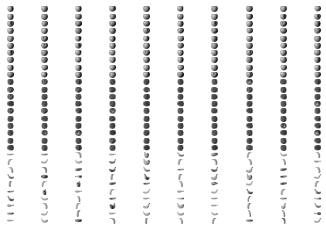

In [ ]:
draw_fruits(fruits)

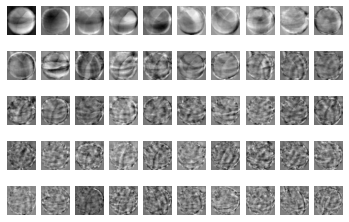

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

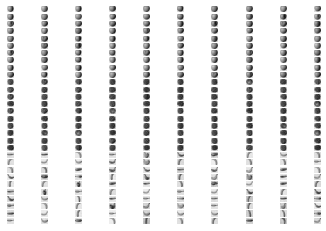

In [ ]:
draw_fruits(fruits_inverse.reshape(-1, 100, 100))

In [ ]:
pca.explained_variance_

array([13825250.21582003,  3244970.17261193,  2147002.11072804,
        1315766.76701663,  1115261.57182826,  1071019.42512468,
         839909.33515218,   670735.97207396,   447908.41083411,
         438278.50222583,   376058.33774071,   308314.27280679,
         286653.15082709,   276360.41106316,   226209.9220531 ,
         210588.31100093,   188950.13273327,   166855.00930829,
         158754.51474879,   156784.13524905,   146172.08360364,
         142735.96294428,   133181.32243314,   127119.52232117,
         121562.03709384,   117269.12626626,   108186.63439012,
         103734.23668348,    99318.4354484 ,    99143.75963493,
          94303.05161574,    90059.87774524,    86460.17345592,
          83479.09919065,    82283.38379803,    80678.55321308,
          78126.45083966,    75317.24552594,    72550.77106155,
          70800.80796432,    69241.70025365,    63894.59266077,
          62983.59494631,    61941.67797219,    60247.024108  ,
          58858.39618312,    56333.53609

In [ ]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645189, 0.00578895, 0.00511201, 0.00486383, 0.00480346,
       0.00447834, 0.00437306, 0.00408033, 0.00389462, 0.00372435,
       0.00359282, 0.00331456, 0.00317815, 0.00304286, 0.00303751,
       0.0028892 , 0.0027592 , 0.00264892, 0.00255759, 0.00252095,
       0.00247178, 0.00239359, 0.00230753, 0.00222277, 0.00216915,
       0.00212139, 0.00195757, 0.00192966, 0.00189773, 0.00184581,
       0.00180327, 0.00172591, 0.00169509, 0.00163043, 0.00159691])

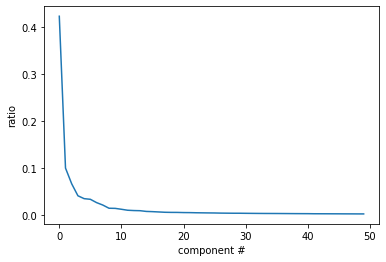

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('component #')
plt.ylabel('ratio')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)
np.unique(target, return_counts=True)

(array([0, 1, 2]), array([100, 100, 100]))

In [ ]:
fruits_2d.shape

(300, 10000)

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(f"validation score: {np.mean(scores['test_score'])}")
print(f"fitted time: {np.mean(scores['fit_time'])}")

validation score: 0.9966666666666667
fitted time: 1.3935416698455811


In [ ]:
fruits_pca.shape

(300, 50)

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(f"validation score: {np.mean(scores['test_score'])}")
print(f"fitted time: {np.mean(scores['fit_time'])}")

validation score: 1.0
fitted time: 0.030308294296264648


In [ ]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
pca.components_.shape 

(2, 10000)

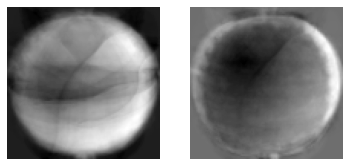

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(f"validation score: {np.mean(scores['test_score'])}")
print(f"fitted time: {np.mean(scores['fit_time'])}")

validation score: 0.9933333333333334
fitted time: 0.0434049129486084


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

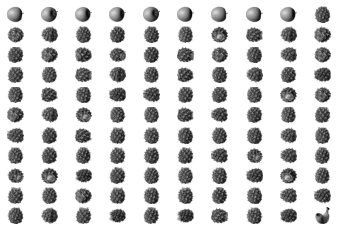

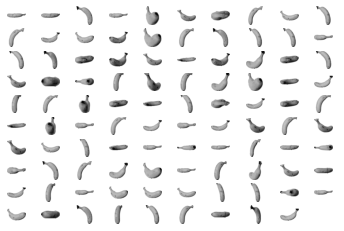

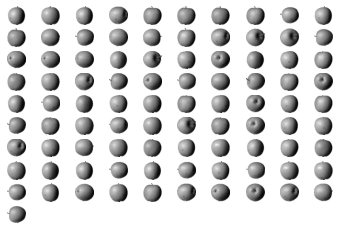

In [ ]:
for label in range(3):
  draw_fruits(fruits[km.labels_ == label])

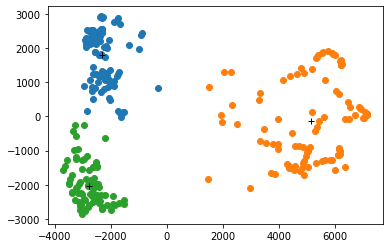

In [ ]:
for label in range(3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])
  plt.plot(km.cluster_centers_[label, 0], km.cluster_centers_[label, 1], 'k+')
plt.show()

In [ ]:
km.cluster_centers_

array([[-2307.63227673,  1803.02129885],
       [ 5133.41018575,  -130.21800791],
       [-2795.25338406, -2037.81055044]])